<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Análisis Exploratorio de Datos (EDA) Procesamiento de Datos </font> </center>



En esta sesión veremos un EDA aplicando algunas técnicas de procesamiento de datos.


#### Glass Identification Data Set
Los datos que utilizaremos en esta sesion se pueden encontrar en:
https://archive.ics.uci.edu/ml/datasets/glass+identification

En el servicio forense, se busca identificar qué tipo de vidrio es una muestra definidos en términos de su contenido de óxido. 

- 1. Id number: 1 a 214
- 2. RI: Indice Refractivo(medida para saber cuánto se reduce la velocidad de la luz al atravesarlo)
- 3. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, como son los atributos 4-10)
- 4. Mg: Magnesio
- 5. Al: Aluminio
- 6. Si: Silicon
- 7. K: Potasio
- 8. Ca: Calcio
- 9. Ba: Bario
- 10. Fe: Hierro
- 11. Tipo de Vidrio: 
    1. ventanas de edificios procesadas por flotación 
    2. ventanas de edificios no procesadas por flotación 
    3. ventanas de vehículos procesadas por flotación
    4. ventanas de vehículos no procesadas por flotación 
    5. contenedores
    6. vajilla
    7. faros


In [1]:
#Importar Librerías
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
data = pd.read_csv('../Data/glass_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 214 non-null    int64  
 1   Indice_Refraccion  214 non-null    float64
 2   Na                 214 non-null    float64
 3   Mg                 214 non-null    float64
 4   Al                 214 non-null    float64
 5   Si                 214 non-null    float64
 6   K                  214 non-null    float64
 7   Ca                 214 non-null    float64
 8   Ba                 214 non-null    float64
 9   Fe                 214 non-null    float64
 10  Tipo_Vidrio        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
from CDIN import CDIN as cd

In [7]:
#Reporte de calidad de datos
cd.dqr(data)

,Nombre columnas,Tipo de datos,valores faltantes,Valores presentes,valores unicos,lista valores unicos,Valores Max,Valores Min
ID,ID,int64,0,214,214,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",214.00000,1.00000
Indice_Refraccion,Indice_Refraccion,float64,0,214,178,"[1.52101, 1.51761, 1.51618, 1.51766, 1.51742, ...",1.53393,1.51115
Na,Na,float64,0,214,142,"[13.64, 13.89, 13.53, 13.21, 13.27, 12.79, 13....",17.38000,10.73000
Mg,Mg,float64,0,214,94,"[4.49, 3.6, 3.55, 3.69, 3.62, 3.61, 3.58, 3.46...",4.49000,0.00000
Al,Al,float64,0,214,118,"[1.1, 1.36, 1.54, 1.29, 1.24, 1.62, 1.14, 1.05...",3.50000,0.29000
Si,Si,float64,0,214,133,"[71.78, 72.73, 72.99, 72.61, 73.08, 72.97, 73....",75.41000,69.81000
K,K,float64,0,214,65,"[0.06, 0.48, 0.39, 0.57, 0.55, 0.64, 0.58, 0.5...",6.21000,0.00000
Ca,Ca,float64,0,214,143,"[8.75, 7.83, 7.78, 8.22, 8.07, 8.17, 8.24, 8.3...",16.19000,5.43000
Ba,Ba,float64,0,214,34,"[0.0, 0.09, 0.11, 0.69, 0.14, 3.15, 0.27, 0.06...",3.15000,0.00000
Fe,Fe,float64,0,214,32,"[0.0, 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14...",0.51000,0.00000


In [8]:
data.describe(include='all')

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Análisis Univariado

<AxesSubplot:xlabel='Tipo_Vidrio', ylabel='count'>

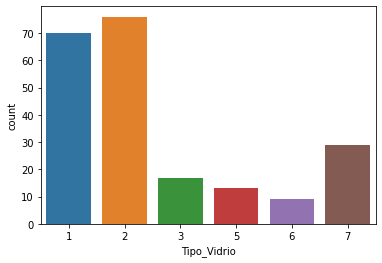

In [9]:
# Variable -> Tipo de Vidrio
#cuántos datos hay de cada tipo de vidrio

sns.countplot(x=data['Tipo_Vidrio'])

In [10]:
# No hay vidrio de tipo 4
data['Tipo_Vidrio'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Tipo_Vidrio, dtype: int64

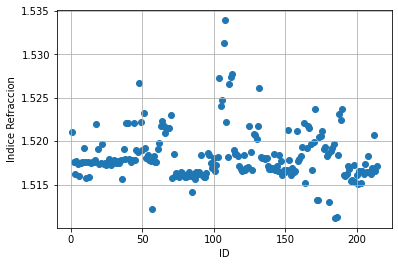

In [11]:
#Graficar una sola variable
plt.scatter(data.ID, data.Indice_Refraccion)
plt.xlabel('ID'),plt.ylabel('Indice Refraccion')
plt.grid()
plt.show()

### Análisis Bivariado

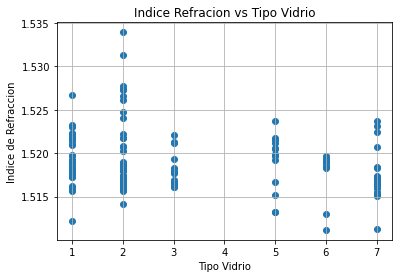

In [12]:
#Indice de refracción vs tipo de vidrio
plt.scatter(data.Tipo_Vidrio, data.Indice_Refraccion)
plt.xlabel('Tipo Vidrio'),plt.ylabel('Indice de Refraccion')
plt.title("Indice Refracion vs Tipo Vidrio")
plt.grid()
plt.show()

**insight1:** El vidrio numero 2 es un vidrio muy resistente ya que tiene un indice de refracción mayor que a los demás

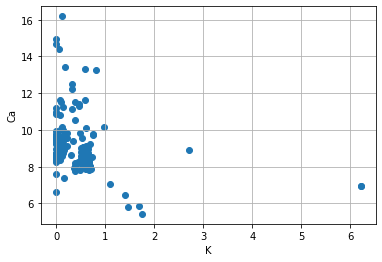

In [13]:
#Potasio vs Calcio
plt.scatter(data.K,data.Ca)
plt.xlabel('K'),plt.ylabel('Ca')
plt.grid()
plt.show()

**insight2:** a mayor potasio hay menos calsio, si estan los dos altos, los vidrios se vuelven más resistentes

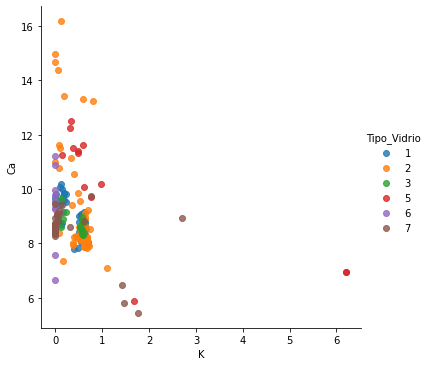

In [14]:
#Graficar una varible con otra y colorear por tipo de vidrio
sns.lmplot(x='K', y='Ca', data=data, hue='Tipo_Vidrio', fit_reg=False)

### Escalamiento
**¿Qué es el escalamiento de los datos?**: Es poner valores en el mismo rango o escala para que ninguna variable sea dominada por otra

**¿Para qué nos sirve?**: La mayoría de las veces, los datos tienen variables que varían mucho en magnitudes, unidades y rango. Pero dado que la mayoría de los algoritmos de aprendizaje automático utilizan la distancia euclidiana entre dos puntos de datos en sus cálculos, esto es un problema.

Las variables con magnitudes altas pesarán mucho más en los cálculos de distancia que las variables con magnitudes bajas. Para que esto no afecte tanto, debemos llevar todas las variables al mismo nivel de magnitudes. Esto se puede lograr escalando.



Algunos algoritmos de aprendizaje auntomático donde el escalamiento importa son:
> **KNN**: con la ditancia Euclidiana es sensible a magnitudes

> **PCA**: este busca traer características con máxima varianza y la varianza es grande para variables con grandes magnitudes. Esto sesga el PCA a variables con grandes magnitudes 

> **Gradiente Descendiente:** se puede acelerar escalando. Ya que $\theta$ desciende más rápido en rangos pequeños y eso hace que oscile menos ya que los brincos son más parejos


In [15]:
#Datos originales
data.head(10)

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


#### Normalizacion

La ecuación para normalizar datos (MinMaxScaler):

$$X\prime = \frac{X-X_{min}}{X_{max}-X_{min}}$$

Los valores quedan entre un rango específico como \[0,1\]. Trata de hacer que los valores sean cercanos a su media


In [17]:
#Usando la librería
from sklearn import preprocessing #librería de machine learning en python

scaler = preprocessing.MinMaxScaler()
names = data.columns[1:10]
scaler_1 = scaler.fit_transform(data.iloc[:,1:10]) #aplicando escalamiento
scaled_df = pd.DataFrame(scaler_1, columns=names)
scaled_df['Tipo_Vidrio'] = data['Tipo_Vidrio']
scaled_df.head()

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


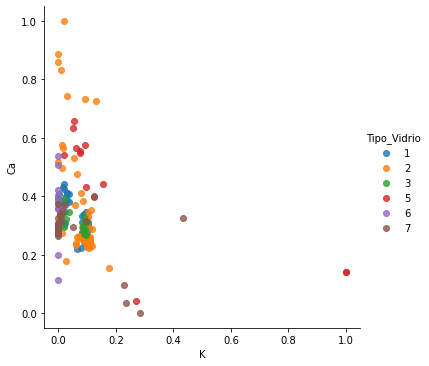

In [18]:
#Graficando las variables transformadas (Normalizadas)
sns.lmplot(x='K', y='Ca', data=scaled_df, hue='Tipo_Vidrio', fit_reg=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


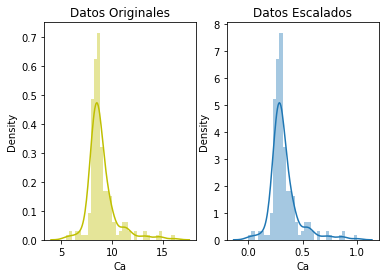

In [22]:
# Graficamos variable original (Ca) vs variable escalada por minmax
fig, ax=plt.subplots(1,2)
sns.distplot(data.Ca, ax=ax[0], color='y')
ax[0].set_title("Datos Originales")
sns.distplot(scaled_df.Ca, ax=ax[1])
ax[1].set_title("Datos Escalados")
plt.show()

**La distribución de los datos no cambia después de haber hecho la Normalización**

#### Estandarizacion

La ecuación para escalar las variables por Estandarizacion (z-score):

$$x\prime=\frac{x-\bar x}{\sigma}$$

Transforma los datos tal que la distribución resultante tiene media de 0 y desviación estándar de 1.
Cuando hay datos atípicos que son importantes y no queremos perder su impacto, usamos esta normalización. Aquí sí se obtienen datos negativos

In [23]:
#con librería
names = data.columns[1:10]
d = preprocessing.scale(data.iloc[:,1:10]) #aplicando la estandarizacion
standard = pd.DataFrame(d, columns=names)
standard['Tipo_Vidrio'] = data['Tipo_Vidrio']
standard.head()

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


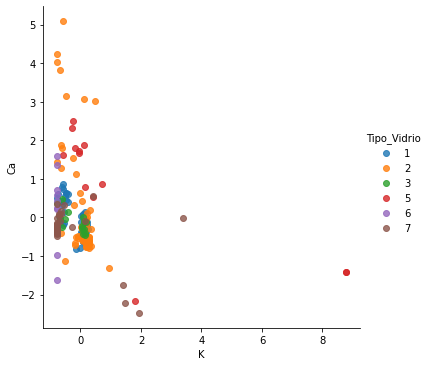

In [24]:
sns.lmplot(x='K', y='Ca', data=standard, hue='Tipo_Vidrio', fit_reg=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


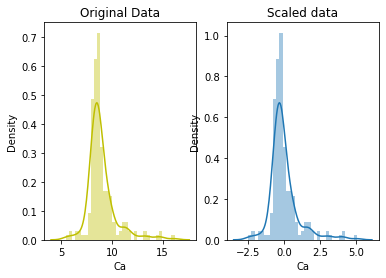

In [25]:
fig, ax=plt.subplots(1,2)
sns.distplot(data.Ca, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(standard.Ca, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

### Asimetría en los datos

La probabilidad de que los datos aparezcan por arriba de su media no es la misma que para valores por debajo de la media. 

Si estamos seguros que los datos son correctos, se puede realizar una transformación para evitar la asimetría

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/765/1*hxVvqttoCSkUT2_R1zA0Tg.gif" width="450px" height="280px" />

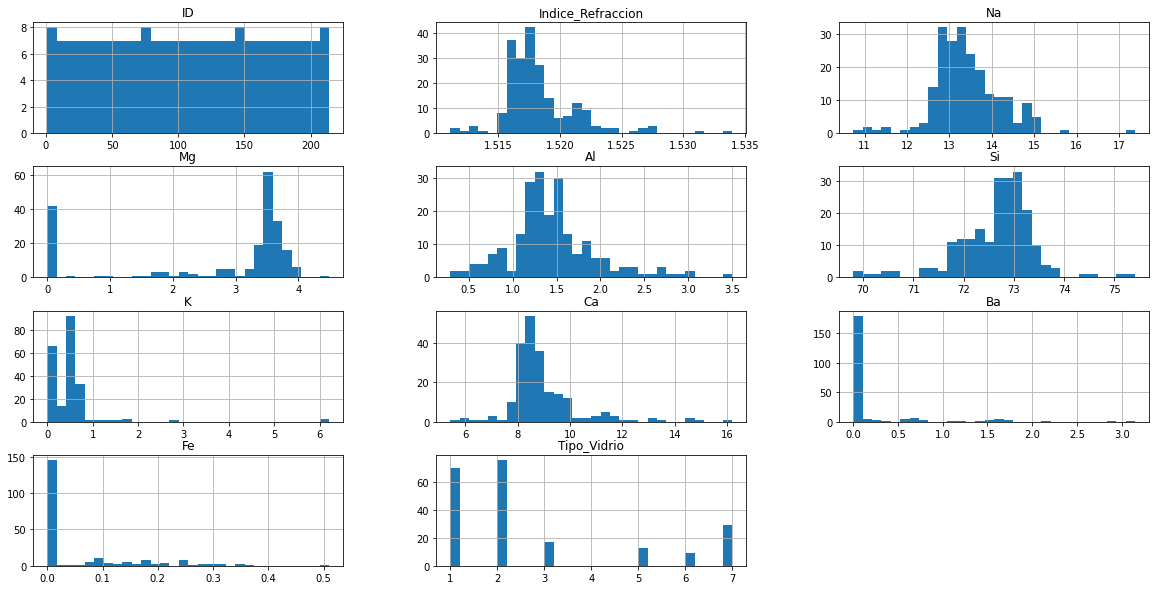

In [26]:
#¿Cómo observar la asimetría de lso datos? --> Histogramas
data.hist(bins=30,figsize=(20,10))
plt.show()

#### Efectos de la asimetría

En datos asimétricos, la región de la cola puede actuar como un valor atípico para el modelo estadístico y sabemos que los valores atípicos afectan negativamente el rendimiento del modelo, especialmente los modelos basados en regresión. Hay modelos estadísticos que son robustos a valores atípicos como los modelos basados en árboles, pero limitarán la posibilidad de probar otros modelos. Por lo tanto, es necesario transformar los datos asimétricos para que se acerquen lo suficiente a una distribución gaussiana o distribución normal. Esto nos permitirá probar más modelos estadísticos.

Fórmula del índice de asimetría estática:
$$skewness = \frac{\sum_{i=1}^{m}(x_{i}-\bar x_{i})^{3}}{(m-1)v^{3/2}}, v=\frac{\sum_{i=1}^{n}(x_{i}-\bar x_{i})^{2}}{m-1} $$

Podemos determinar el nivel de asimetría de la forma:
- Distribución altamente sesgada: si el valor del sesgo es menor a -1 o mayor a +1.
- Distrubición moderadamente sesgada: si el valor del sesgo es entre -1 y -0.5 o entre +0.5 y +1
- Distribución aproximadamente simétrica: si el valor del sesgo está entre -0.5 y +0.5


In [38]:
def dqr(df):
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Nombre columnas'], index=list(data.columns.values))
    
    #%% Calculo de la asimetría
    skewness = round(df.skew(),2)
    skewness = skewness.to_frame()
    skewness = skewness.rename(columns={0: "skewness value"}) 

    def f(x):
        if x['skewness value'] < -1 or x['skewness value'] > 1: return 'Highly Skewed'
        elif (x['skewness value']<=0 and x['skewness value']>=-0.5) or (x['skewness value'] >=0 and x['skewness value']<=0.5):
            return 'Symmetric distribution'
        else: return 'Moderately skewed'

    skewness['skewness'] = skewness.apply(f, axis=1)
    return columns.join(skewness)



In [39]:
dqr(data)

,Nombre columnas,skewness value,skewness
ID,ID,0.00,Symmetric distribution
Indice_Refraccion,Indice_Refraccion,1.63,Highly Skewed
Na,Na,0.45,Symmetric distribution
Mg,Mg,-1.15,Highly Skewed
Al,Al,0.91,Moderately skewed
Si,Si,-0.73,Moderately skewed
K,K,6.55,Highly Skewed
Ca,Ca,2.05,Highly Skewed
Ba,Ba,3.42,Highly Skewed
Fe,Fe,1.75,Highly Skewed


### ¿Cómo mitigar la asimetría?

**Box Cox:** Una transformación de Box Cox es una transformación de variables no normales en una forma normal. (Lambda entre -5 y 5). Aplicada a valores positivos. 

$$y(\lambda)=
    \begin{cases}
      \frac{(y)^{\lambda}-1}{\lambda} & \text{if $\lambda\neq0$}\\
      \log(y) & \text{if $\lambda=0$ }\\
     \end{cases}$$


### Datos con sesgo positivo

**Transformación de raíz cúbica:** Es una transformación bastante fuerte con un efecto sustancial en la forma de la distribución, pero es más débil que el logaritmo. También se puede aplicar a valores negativos y cero.
$$x_{i}^{*}=(x_{i})^{1/3}$$

**Transformación de raíz cuadrada:** Aplicado solo a valores positivos. 
$$x_{i}^{*}=\sqrt(x_{i})$$

**Transformación logarítmica:** Es una transformación fuerte que puede ser usada para reducir el sesgo positivo. Aplicado solo a valores positivos
$$x_{i}^{*}=\log(x_{i})$$



### Datos con sesgo negativo

Las transformaciones comunes incluyen elevar al cuadrado, raíz cúbica y logarítmica.

**Transformación al cuadrado:** Tiene un efecto moderado en la forma de la distribución y podría usarse para reducir el sesgo hacia la izquierda.
$$x_{i}^{*}=(x_{i})^{2}$$


Otro método para manejar la asimetría es encontrar valores atípicos y posiblemente eliminarlos.


In [44]:
# Varias transformaciones
data1=data.copy()
#Logarítmica
data1['Indice_Refraccion_no_skewness'] = np.log(data1.Indice_Refraccion)
data1.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio,Indice_Refraccion_no_skewness
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0.419375
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0.417137
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0.416194
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0.417170
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0.417012


In [45]:
#Elevar al cuadrado
data1['Indice_Refraccion_no_skewness'] = np.sqrt(data1.Indice_Refraccion)
data1.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio,Indice_Refraccion_no_skewness
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.233292
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.231913
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.231333
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.231933
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.231836


In [46]:
## Transformacion BoxCox usando scipy
from scipy import stats
data1['Indice_Refraccion_no_skewness'] = stats.boxcox(data1.Indice_Refraccion,lmbda=-5)
data1.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio,Indice_Refraccion_no_skewness
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0.175432
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0.175156
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0.175038
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0.175160
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0.175140


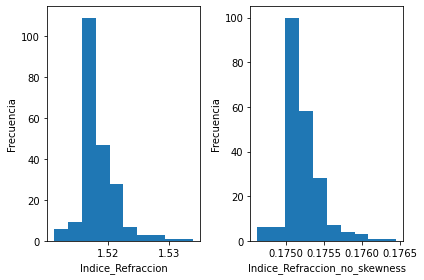

In [47]:
#Comparación de datos sesgados y transformados
fig = plt.figure()
plt.subplot(1,2,1)
plt.hist(data1.Indice_Refraccion)
plt.xlabel('Indice_Refraccion'),plt.ylabel('Frecuencia')
plt.subplot(1,2,2)
plt.hist(data1.Indice_Refraccion_no_skewness)
plt.xlabel('Indice_Refraccion_no_skewness'),plt.ylabel('Frecuencia')
fig.tight_layout()
plt.show()


In [50]:
#Sesgo para el índice de refracción transformado
data.Indice_Refraccion.skew()

1.6254305060087644

In [51]:
#Sesgo para el índice de refracción transformado
(data1.Indice_Refraccion_no_skewness.skew())

1.5506119529509017

### Valores Atípicos

> Un dato se considera atípico si aparece por fuera de un rango que se considera válido o aceptable para el fenómeno que se analiza.

> Para determinar si los datos tienen valores atípicos es posible usar gráficas de bigotes en los datos.

> Para cuantificar el rango aceptable o permitido para encontrar datos atípicos se utiliza el parámetro IQR (inter quantilerange).

$$IQR=75^{th}quantile - 25^{th}quantile$$
$$upper_{boundary}=75^{th}quantile+(\alpha*IQR)$$
$$lower_{boundary}=25^{th}quantile-(\alpha*IQR)$$

donde $\alpha$=1.5, y está relacionado a la probabilidad de ocurrencia si los datos tuvieran una distribución normal.

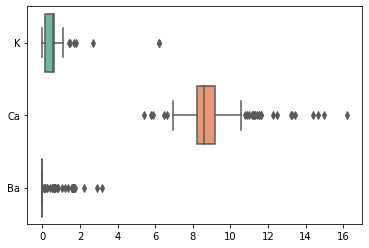

In [52]:
#Una forma de ver datos atípicos --> con gráficos de bigote (Boxplot)
ax = sns.boxplot(data=data.iloc[:,6:9], orient="h", palette="Set2")


<AxesSubplot:ylabel='Indice_Refraccion'>

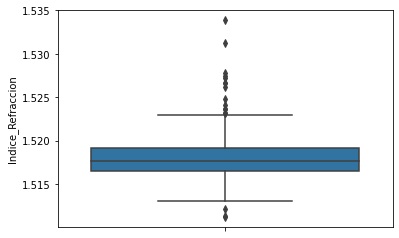

In [53]:
# Un boxplot no se ve afectado por el escalamiento
#Datos sin transformar
sns.boxplot(y=data['Indice_Refraccion'])

<AxesSubplot:ylabel='Indice_Refraccion_no_skewness'>

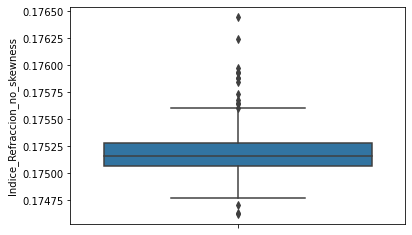

In [54]:
# Un boxplot no se ve afectado por el escalamiento
#Datos transformados
sns.boxplot(y=data1['Indice_Refraccion_no_skewness'])

In [58]:
#Funcion para determinar más específicamente los outliers a través del rango IQR

def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

for col in data.columns:
    lmin,lmax = find_boundaries(data[col])
    outliers = np.where(data[col] > lmax, True,np.where(data['Indice_Refraccion'] < lmin, True, False))
    outliers_df = data.loc[outliers, col]
    print(f'column: {col}\n{outliers_df.head()}')

column: ID
Series([], Name: ID, dtype: int64)
column: Indice_Refraccion
47     1.52667
50     1.52320
56     1.51215
103    1.52725
104    1.52410
Name: Indice_Refraccion, dtype: float64
column: Na
0    13.64
1    13.89
2    13.53
3    13.21
4    13.27
Name: Na, dtype: float64
column: Mg
Series([], Name: Mg, dtype: float64)
column: Al
163    3.50
171    3.04
172    3.02
191    2.38
192    2.79
Name: Al, dtype: float64
column: Si
0    71.78
1    72.73
2    72.99
3    72.61
4    73.08
Name: Si, dtype: float64
column: K
163    1.68
171    6.21
172    6.21
185    1.76
186    1.46
Name: K, dtype: float64
column: Ca
0    8.75
1    7.83
2    7.78
3    8.22
4    8.07
Name: Ca, dtype: float64
column: Ba
32     0.09
36     0.11
61     0.69
99     0.14
100    0.11
Name: Ba, dtype: float64
column: Fe
5      0.26
44     0.30
56     0.31
71     0.32
105    0.34
Name: Fe, dtype: float64
column: Tipo_Vidrio
185    7
186    7
187    7
188    7
189    7
Name: Tipo_Vidrio, dtype: int64


#### Tranformación de datos atípicos
Si los datos atípicos son importantes y no es posible descartarlos, entonces 
es posible hacer una transformación de los datos para que se encuentren en un espacio con escalas similares.

Una transformación que se puede hacer es utilizar una función que mitigue la asimetría. 

### Datos Nulos

Un dato nulo se refiere a la ausencia de un valor o valores en al menos una de las variables.
El origen de estos valores pueden ser distintos (errores de captura, censura, funcionamiento del fenómeno, etc.), pero hay que tratar de identificarlas para poder realizar el tratamiento correcto.

Si los datos no pueden ser eliminados y es necesario sustituirlos para poder procesarlos con algoritmos sensibles a la falta de datos.
Dentro de los criterios comúnmente usados para sustituir los valores nulos se encuentran.

>Sustitución por una constante

>Sustitución por una etiqueta

>Sustitución por la media

>Sustitución por la mediana

>Sustitución por el más frecuente

In [63]:
#Insertar datos nulos (10%)
data_nulos = data.mask(np.random.random(data.shape) < .1)

In [64]:
#Contar datos nulos en nuevo dataset
pd.DataFrame(data_nulos.isnull().sum(), columns=['Valores_Nulos'])

,Valores_Nulos
ID,24
Indice_Refraccion,20
Na,19
Mg,21
Al,33
Si,22
K,18
Ca,18
Ba,20
Fe,20


**Generalmente si tenemos arriba del 90% de datos nulos quitamos la variable, sino podemos utilizar una medida estadística para imputar esos valores nulos**

### Imputación de datos nulos

In [65]:
#Imputar datos nulos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=99)
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(data_nulos)
imputer.statistics_ # revisar los valores por los que remplazará


array([ 1.    ,  1.5159, 13.    ,  0.    ,  1.54  , 72.99  ,  0.    ,
        8.43  ,  0.    ,  0.    ,  1.    ])

In [68]:
data_nulos_imputados = imputer.transform(data_nulos)
data_nulos_imputados = pd.DataFrame(data_nulos_imputados, columns=data.columns)
pd.DataFrame(data_nulos_imputados.isnull().sum(), columns=['Valores_Nulos'])

,Valores_Nulos
ID,0
Indice_Refraccion,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
